# Uppgift 1 - uppvärmning betyg och prov

#### a) Rita ett linjediagram för andel elever som saknar godkänt betyg i ett eller fler ämnen för läsår 18-23. Ta med totalt, flickor och pojkar i samma graf.

In [55]:
import pandas as pd

df_certificate = pd.read_excel('../data/python//betyg_o_prov_riksnivå.xlsx', skiprows=7, sheet_name='Tabell 1B')
df_certificate = df_certificate.iloc[:5]
df_certificate = df_certificate.drop(columns=['Totalt' , 'Flickor', 'Pojkar' , 'Totalt.1' , 'Flickor.1', 'Pojkar.1'] , axis=1)

column_rename = {df_certificate.columns[0]: "Years", df_certificate.columns[1]: "Totalt" ,df_certificate.columns[2]: "Flickor" , df_certificate.columns[3]: "Pojkar"}

df_certificate = df_certificate.rename(columns = column_rename)

df_certificate

,Years,Totalt,Flickor,Pojkar
0,2018/19,24.5,21.7,27.2
1,2019/20,23.9,21.4,26.3
2,2020/21,23.9,21.9,25.9
3,2021/22,25.9,24.2,27.5
4,2022/23,26.8,25.5,28.0


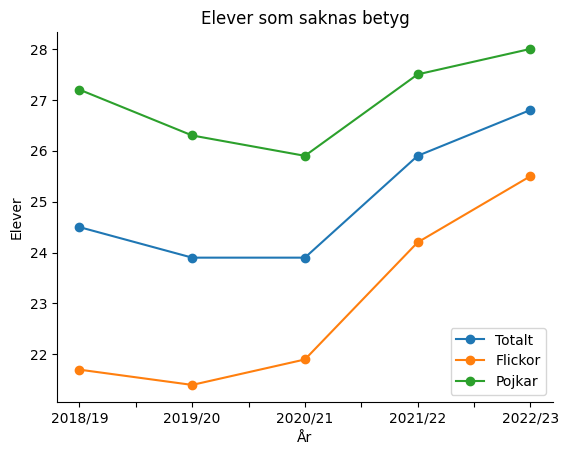

In [56]:
import matplotlib.pyplot as plt 

ax_certificate = df_certificate.plot(x="Years", y=["Totalt", "Flickor", "Pojkar"], marker="o")
ax_certificate.spines["top"].set_visible(False)
ax_certificate.spines["right"].set_visible(False)

plt.title('Elever som saknas betyg')
plt.xlabel('År')
plt.ylabel('Elever')  
plt.show()

#### b) Rita ett linjediagram för meritvärde för 16 ämnen för totalt, flickor och pojkar för läsår 18-23.

In [57]:
df_certificate_tabell2 = pd.read_excel('../data/python/betyg_o_prov_riksnivå.xlsx', skiprows=7 , sheet_name='Tabell 1B')
df_certificate_tabell2 = df_certificate_tabell2.rename(columns={df_certificate_tabell2.columns[0]: 'År'})
df_certificate_tabell2 = df_certificate_tabell2.iloc[:5]
df_certificate_tabell2 = df_certificate_tabell2.iloc[:,:4]

df_certificate_tabell2

,År,Totalt,Flickor,Pojkar
0,2018/19,221.7,234.3,209.8
1,2019/20,222.9,235.7,210.9
2,2020/21,223.9,235.4,212.9
3,2021/22,221.2,231.6,211.4
4,2022/23,220.6,229.7,211.9


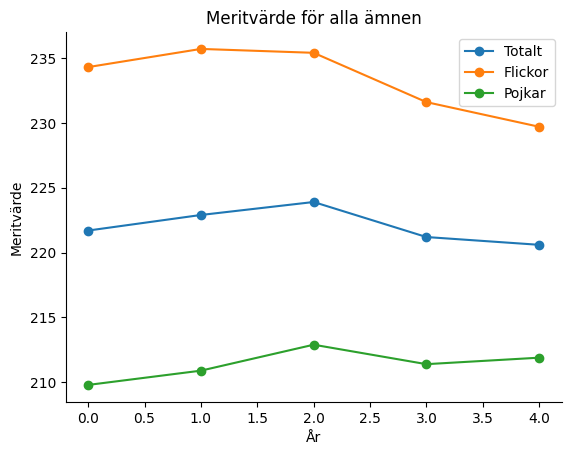

In [58]:
import matplotlib.pyplot as plt

selected_columns = ['Totalt', 'Flickor', 'Pojkar']
ax_plot = df_plot = df_certificate_tabell2[selected_columns]

ax_plot = df_plot.plot(marker='o', linestyle='-')
ax_plot.spines["top"].set_visible(False)
ax_plot.spines["right"].set_visible(False)
plt.title('Meritvärde för alla ämnen')
plt.xlabel('År')
plt.ylabel('Meritvärde')
plt.show()

#### c) Undersök nu andra variabler, och hur de påverkar meritvärde och andel med minst ett saknat betyg. Data finns för läsår 22/23. Exempel kan man undersöka föräldrarnas utbildningsbakgrund. Rita lämpliga grafer.

In [59]:
df_variables = pd.read_excel('../data/python/betyg_o_prov_riksnivå.xlsx' , sheet_name="Tabell 1B" , skiprows=7)
df_variables = df_variables.drop(df_variables.index[0:12])
df_variables = df_variables.drop([14, 18, 19, 20, 21, 25, 26, 27])
df_variables = df_variables.iloc[:, [0,-2, -1]]
df_variables = df_variables.reset_index(drop=True)

df_variables = df_variables.rename(columns={df_variables.columns[0]: "Titles" , df_variables.columns[1]: 'Flickor_%' , df_variables.columns[2]: 'Pojkar_%'})
df_variables

,Titles,Flickor_%,Pojkar_%
0,Elever med svensk bakgrund,20.5,22.2
1,Elever med utländsk bakgrund,37.8,42.5
2,Födda i Sverige,30.8,34.3
3,"Födda utomlands, inv. före 2014",29.8,34.0
4,"Födda utomlands, inv. 2014 el. senare",51.1,57.2
5,Förgymnasial utbildning,61.5,65.3
6,Gymnasial utbildning,35.2,39.5
7,Eftergymnasial utbildning,16.1,17.5


In [60]:
import plotly.express as px

colour1 = {"Flickor_%":"#9925be", "Pojkar_%":"#2596be"}
fig =px.bar(
    df_variables.reset_index(),
    x="Titles",
    y=["Flickor_%", "Pojkar_%"],
    barmode="group",
    title="Variabler som påverkar meritvärde",
    labels={"value": "Proportion(%)", "variable": "Elevtyp"},
    color_discrete_map =colour1   
)

fig.update_layout(
    annotations=[
        dict(
            x=1,
            y=1.09,
            showarrow=False,
            font=dict(size=10)
        )
    ]
)

fig.show()